## Project Description
You are an analyst at Megaline, a federal mobile operator. Customers are offered two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.
You will have to make a preliminary analysis of tariffs on a small sample of customers. You have at your disposal the data of 500 Megalyne users: who they are, where they come from, what tariff they use, how many calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and conclude which tariff is better.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

### Open the data file and study the general information

In [32]:
calls = pd.read_csv('calls.csv')

In [33]:
print(calls.head())

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


In [34]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<AxesSubplot:>

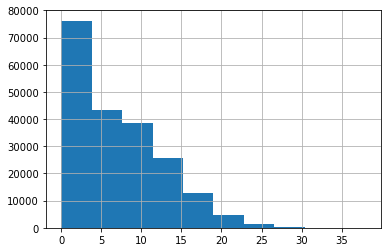

In [35]:
calls['duration'].hist()

In [36]:
sessions = pd.read_csv('internet.csv')

<AxesSubplot:>

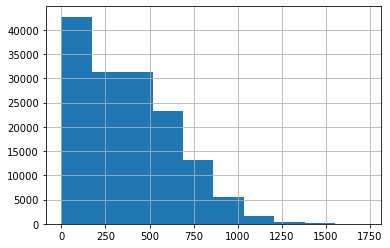

In [37]:
sessions['mb_used'].hist()

In [38]:
messages = pd.read_csv('messages.csv')

In [39]:
print(messages.head())

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [40]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [41]:
tariffs = pd.read_csv('tariffs.csv')

In [42]:
print(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


In [43]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [44]:
users = pd.read_csv('users.csv')

In [45]:
print(users.head())

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  


In [46]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Data preparation

In [47]:

users['reg_date']= pd.to_datetime(users['reg_date'])


users['churn_date']= pd.to_datetime(users['churn_date'])


calls['call_date']= pd.to_datetime(calls['call_date'])


messages['message_date']= pd.to_datetime(messages['message_date'])

sessions['session_date']= pd.to_datetime(sessions['session_date'])

There are calls with zero duration in the data. This is not a mistake: missed calls are marked with zeros, so they do not need to be deleted.

However, in the `duration` column of the `calls` dataframe, the values are fractional. Round up the values of the `duration` column using the `numpy.ceil() method` and cast the 'duration` column to the `int` type.

In [48]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Delete the column `Unnamed: 0` from the dataframe `sessions`. A column with this name occurs when data is saved with an index (`df.to_csv(..., index=column)`). He won't be needed right now.

In [49]:
sessions.drop('Unnamed: 0', axis='columns', inplace=True)

Create a month column in the 'calls', 'sessions', 'messages' dataframes with the month number from the call_date column

In [50]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [51]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [52]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

Let's calculate the number of minutes, calls, messages, megabytes used for each user by month and save it

In [53]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [54]:
print(calls_per_month.head(30))

               calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21


In [55]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [56]:
print(minutes_per_month.head(30))

               minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130


In [57]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [58]:
print(messages_per_month.head(30))

               messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38


In [59]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [60]:
print(sessions_per_month.head(30))

                mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04


### Data analysis and revenue calculation

We combine all the values calculated above into one user_behavior dataframe. For each user -month pair, information about the tariff, the number of calls, messages and megabytes spent will be available.

In [61]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

7.6% of customers from the dataset have terminated the contract

In [62]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's check missing values in the user_behavior table after merging:

In [63]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Fill in the missing values in the data:

In [64]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Adding information about tariffs

In [65]:
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

In [66]:
user_behavior = user_behavior.merge(tariffs, on='tariff')

We count the number of minutes of conversation, messages and megabytes exceeding those included in the tariff

In [67]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

We convert megabytes exceeding the tariff into gigabytes and save them in the paid_gb column

In [68]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

We count the revenue for minutes of conversation, messages and the Internet

In [69]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

We calculate the monthly revenue from each user, it will be stored in the total_cost column

In [70]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

The stats_df dataframe for each "month-tariff" pair will store the main characteristics

In [71]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


Distribution of the average number of calls by tariff types and months

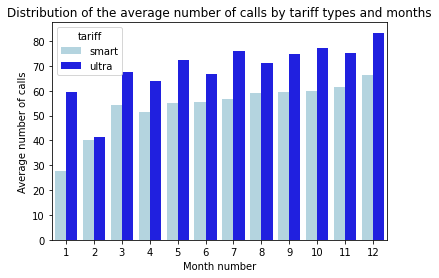

In [72]:
import seaborn as sns

ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average number of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of calls');

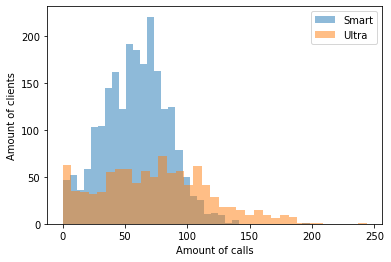

In [73]:

user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Amount of calls')
plt.ylabel('Amount of clients')
plt.show()

Distribution of the average duration of calls by tariff types and months

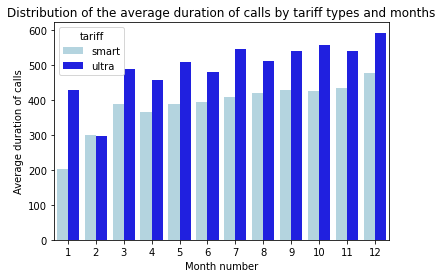

In [74]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the average duration of calls by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average duration of calls');

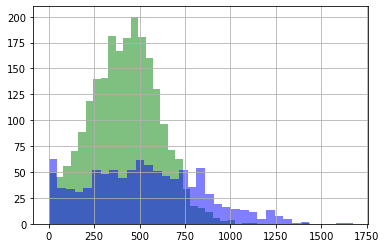

In [75]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

The average duration of conversations for subscribers of the Ultra tariff is longer than for subscribers of the Smart tariff. During the year, users of both tariffs increase the average duration of their conversations. The growth of the average duration of conversations among subscribers of the Smart tariff is uniform throughout the year. Users of the Ultra tariff do not show such linear stability. It is worth noting that in February, subscribers of both tariff plans had the lowest rates.

Distribution of the average number of messages by tariff types and months

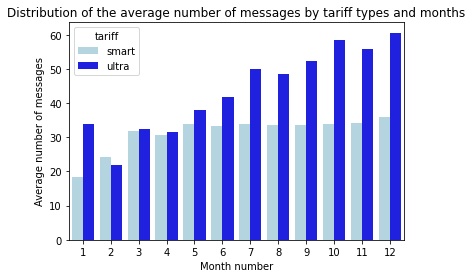

In [76]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the average number of messages by tariff types and months')
ax.set(xlabel='Month number', ylabel='Average number of messages');

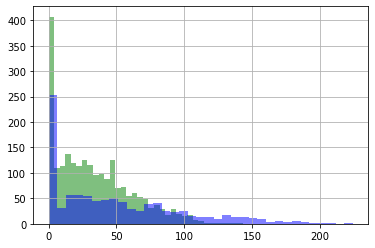

In [77]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

On average, Ultra tariff users send more messages - almost 20 messages more than Smart tariff users. The number of messages during the year on both tariffs is growing. The dynamics of sending messages is similar to the trends in the duration of conversations: in February, the smallest number of messages for the year was noted and users of the Ultra tariff also show nonlinear positive dynamics.

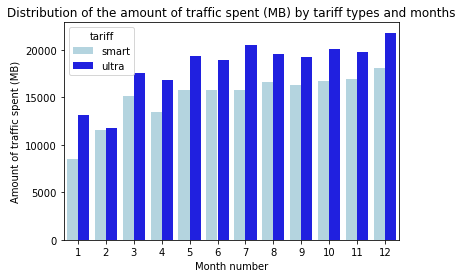

In [78]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the amount of traffic spent (MB) by tariff types and months')
ax.set(xlabel='Month number', ylabel='Amount of traffic spent (MB)');

Comparison of spent megabytes among users of Smart and Ultra tariffs

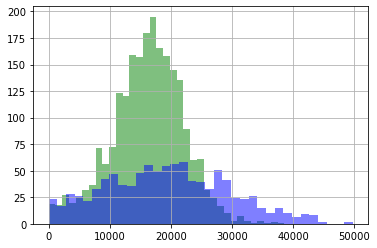

In [79]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

The least users used the Internet in January, February and April. Most often, subscribers of the Smart tariff spend 15-17 GB, and subscribers of the Ultra tariff plan spend 19-21 GB.

### Hypothesis testing

Hypothesis testing: the average revenue of users of the "Ultra" and "Smart" tariffs differ

H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users`
H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users`
alpha = 0.05

In [80]:

ultra = user_behavior.query('tariff == "ultra"')['total_cost']
smart = user_behavior.query('tariff == "smart"')['total_cost']

alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It is not possible to reject the null hypothesis")

4.2606313931076085e-250
We reject the null hypothesis


Hypothesis testing: users from Moscow bring in more revenue than users from other cities;

H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow`
H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow`
alpha = 0.05

In [81]:
users_moscow = user_behavior.query('city == "Москва"')['total_cost']
users_out_of_moscow = user_behavior.query('city != "Москва"')['total_cost']

alpha = .05

results = st.ttest_ind(
    users_moscow , 
    users_out_of_moscow, equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It is not possible to reject the null hypothesis")

0.5257376663729298
It is not possible to reject the null hypothesis
